# Workshop 4 : Automated Data Pipeline with Airflow

## สร้าง Cloud Composer

### ตั้งค่า Cloud Composer

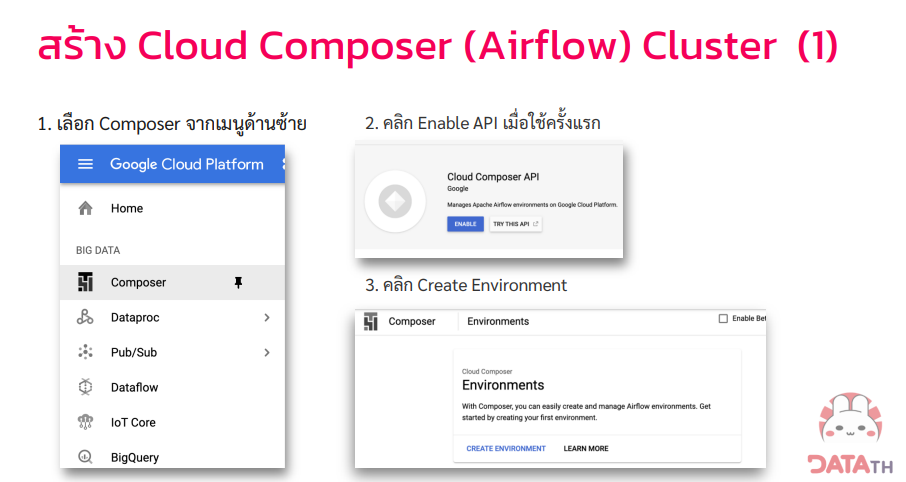

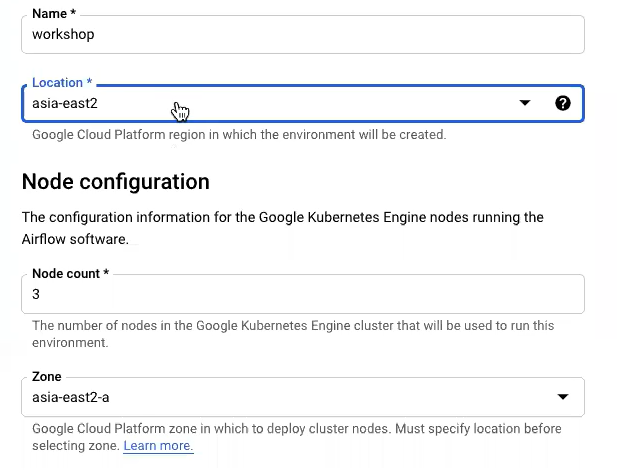

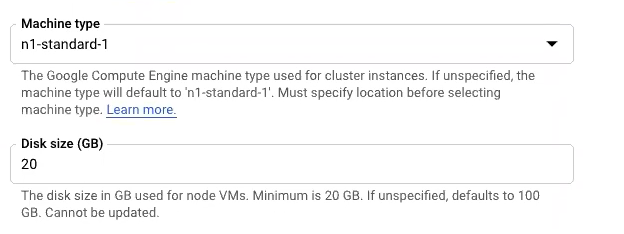

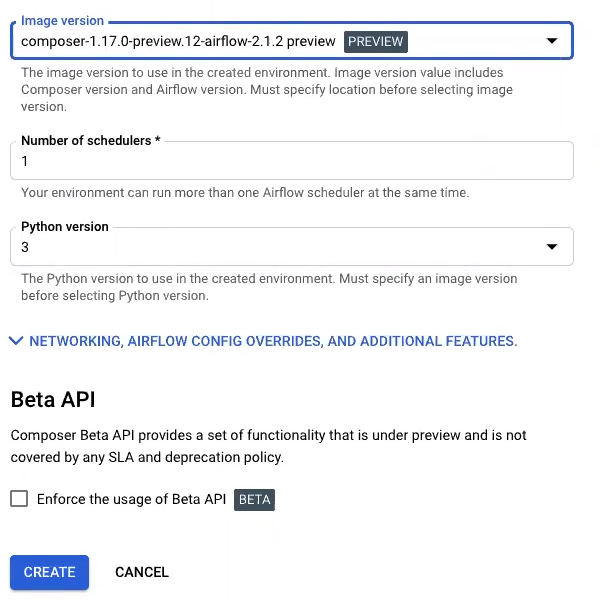

* การ CREATE รอระยะเวลาประมาณ 20 นาทีในการสร้าง Cloud Compser

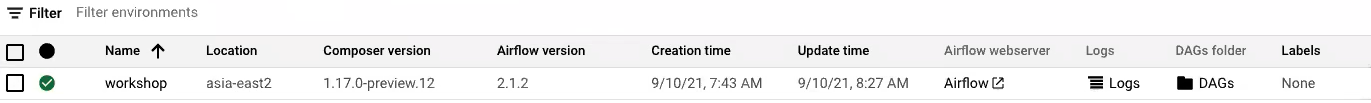

###  install python packages in airflow

* สร้าง Cloud Compser สำเสร็จและทำการ install python packages in airflow

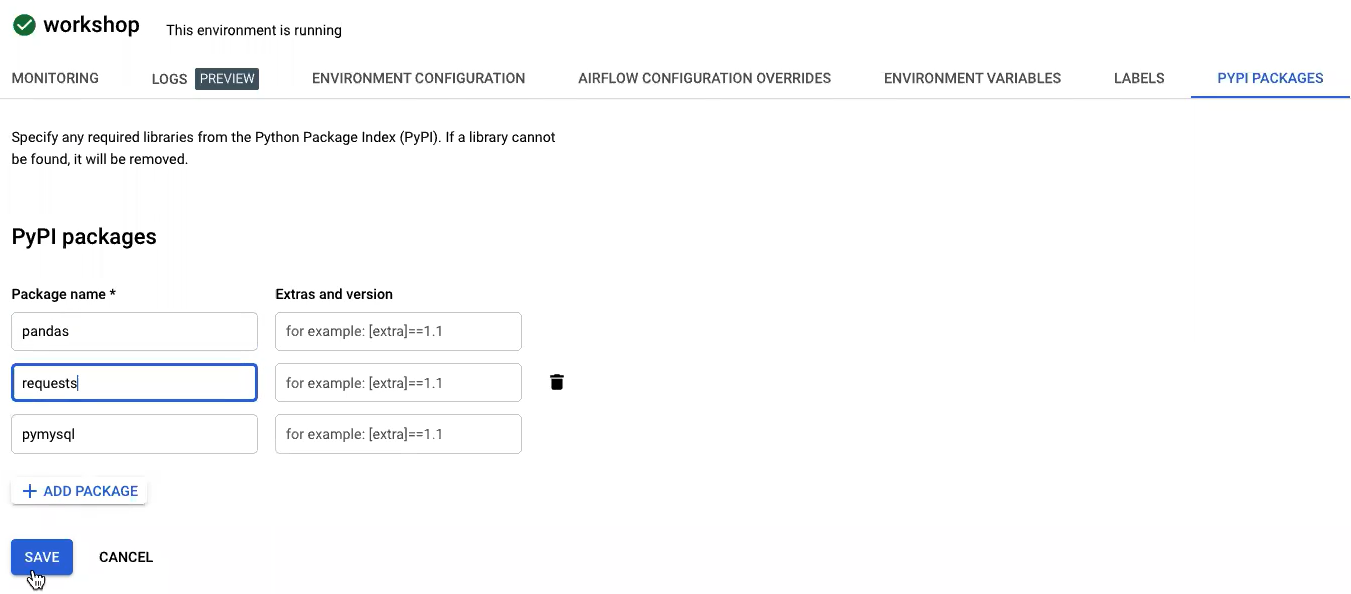

* สามารถเข้าไปดู Airflow

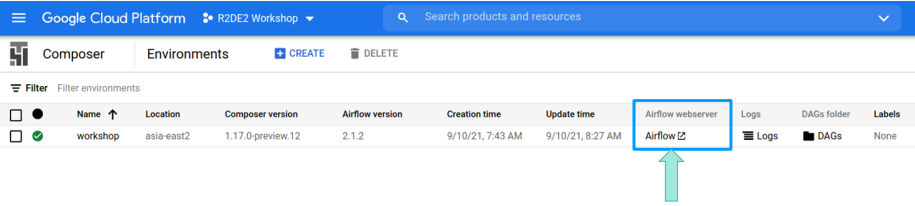

* ระบบแสดงหน้า Airflow

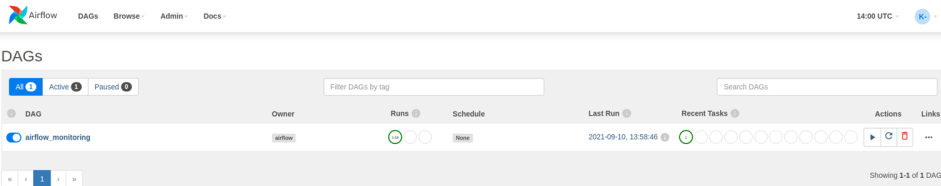

## Exercise

### Exercise 1

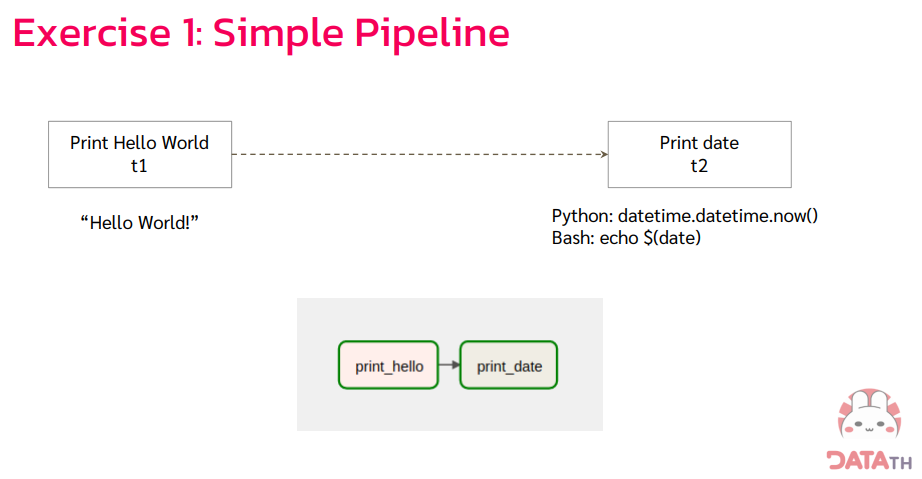

1. สร้างไฟล์ DAG ที่ cloud shell โดยใช้ชื่อไฟล์ว่า `start_ws4_exercise1`

In [ ]:
import datetime

from airflow.models import DAG
from airflow.operators.python import PythonOperator
from airflow.operators.bash import BashOperator
from airflow.utils.dates import days_ago

default_args = {
    'owner': 'datath',
}

def my_function(something: str):
    print(something)

with DAG(
    "exercise1_simple_dag",
    start_date=days_ago(1),
    schedule_interval=None,
    tags=["exercise"]
) as dag:

    # Exercise1: Simple Pipeline - Hello World Airflow!
    # ใน exercise นี้จะได้รู้จักกับ PythonOperator (และ BashOperator)
    # และลองเขียน task dependencies

    t1 = PythonOperator(
        task_id="print_hello",
        python_callable=my_function,
        op_kwargs={"something": "Hello World!"},
    )

    t2 = BashOperator(
        task_id="print_date",
        bash_command="echo $(date)",
    )

    t1 >> t2

* หรือเขียน DAG เป็น taskflow

In [ ]:
import datetime

from airflow.decorators import dag, task
from airflow.utils.dates import days_ago

default_args = {
    'owner': 'datath',
}

# Exercise1: Simple Pipeline - Hello World Airflow!
# รู้จักกับ Task Flow API ที่มาใหม่ใน Airflow 2.0
# เป็นวิธีการเขียน DAG แบบใหม่ ที่อ่านง่าย และทันสมัยขึ้น เหมาะสำหรับโค้ดที่เป็น PythonOperator ทั้งหมด
# ศึกษา tutorial ฉบับเต็มได้ที่นี่ https://airflow.apache.org/docs/apache-airflow/stable/tutorial_taskflow_api.html

@task()
def print_hello():
    print("Hello World!")

@task()
def print_date():
    print(datetime.datetime.now())

@dag(default_args=default_args, schedule_interval=None, start_date=days_ago(1), tags=['exercise'])
def exercise1_taskflow_dag():

    t1 = print_hello()
    t2 = print_date()

    t1 >> t2

exercise1_dag = exercise1_taskflow_dag()

2. Upload ไฟล์ DAG เข้าสู่ bucket ที่เชื่อมต่อกับ Cloud Composer
```
gsutil cp [FILE] gs://[CLOUD_COMPOSER_BUCKET]/dags/
```

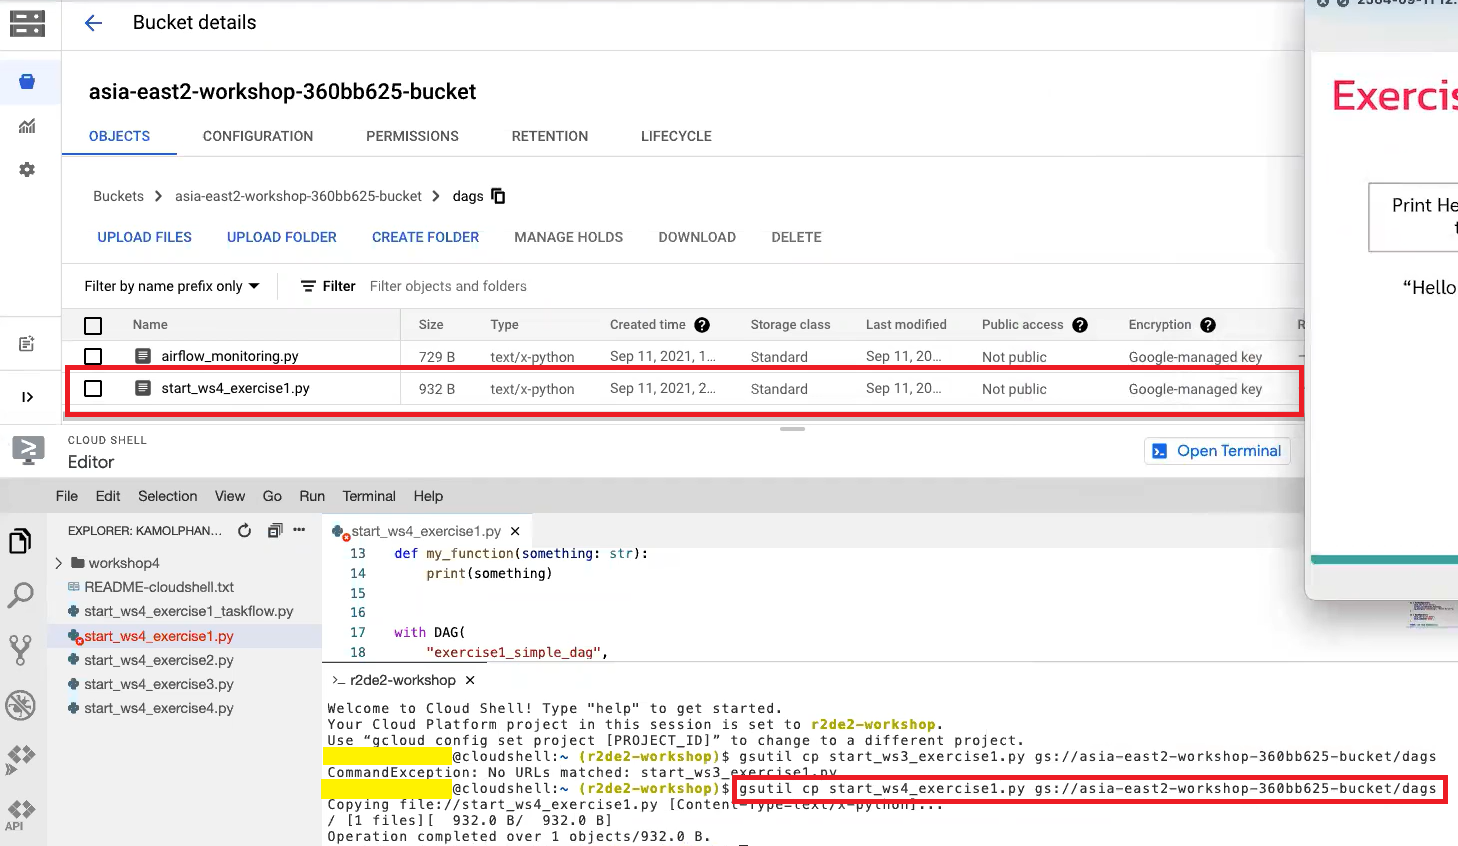

3. เข้าไปดูที่ airflow เพื่อดูผลลัพธ์

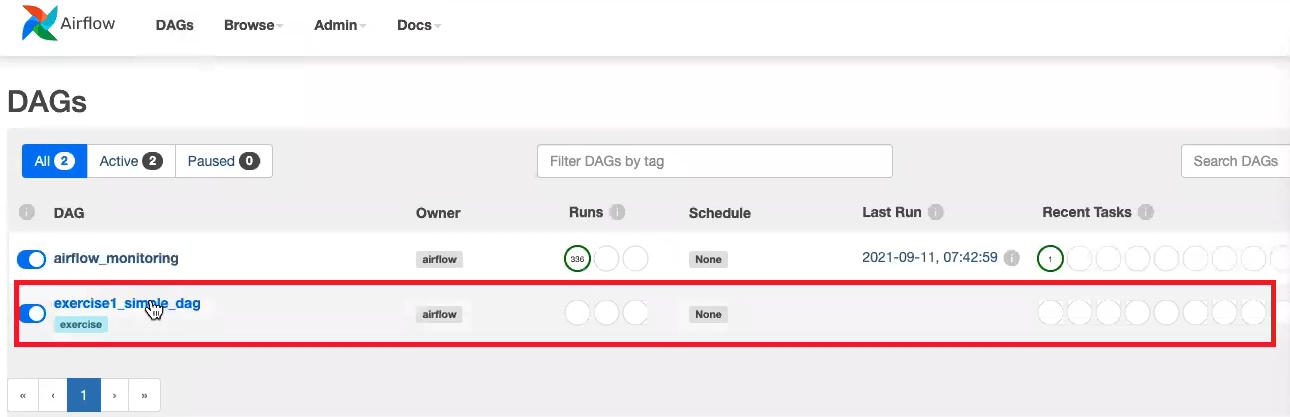

* run task เสร็จเรียบร้อย

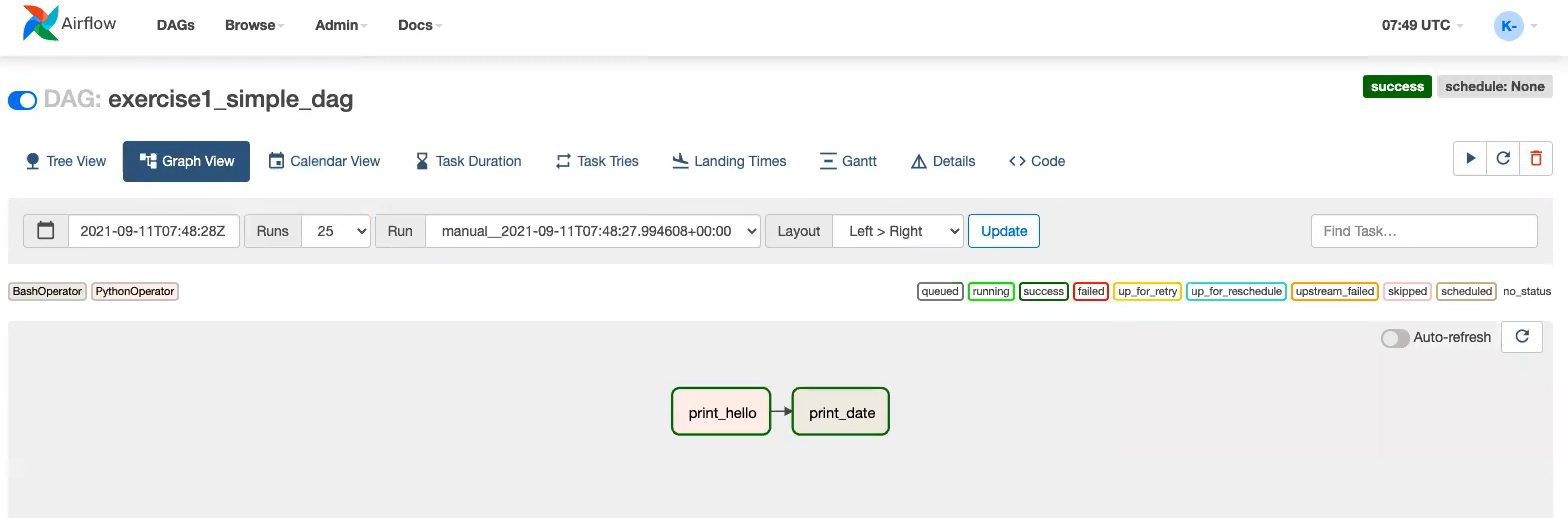

* ดู log ของ task print_hello

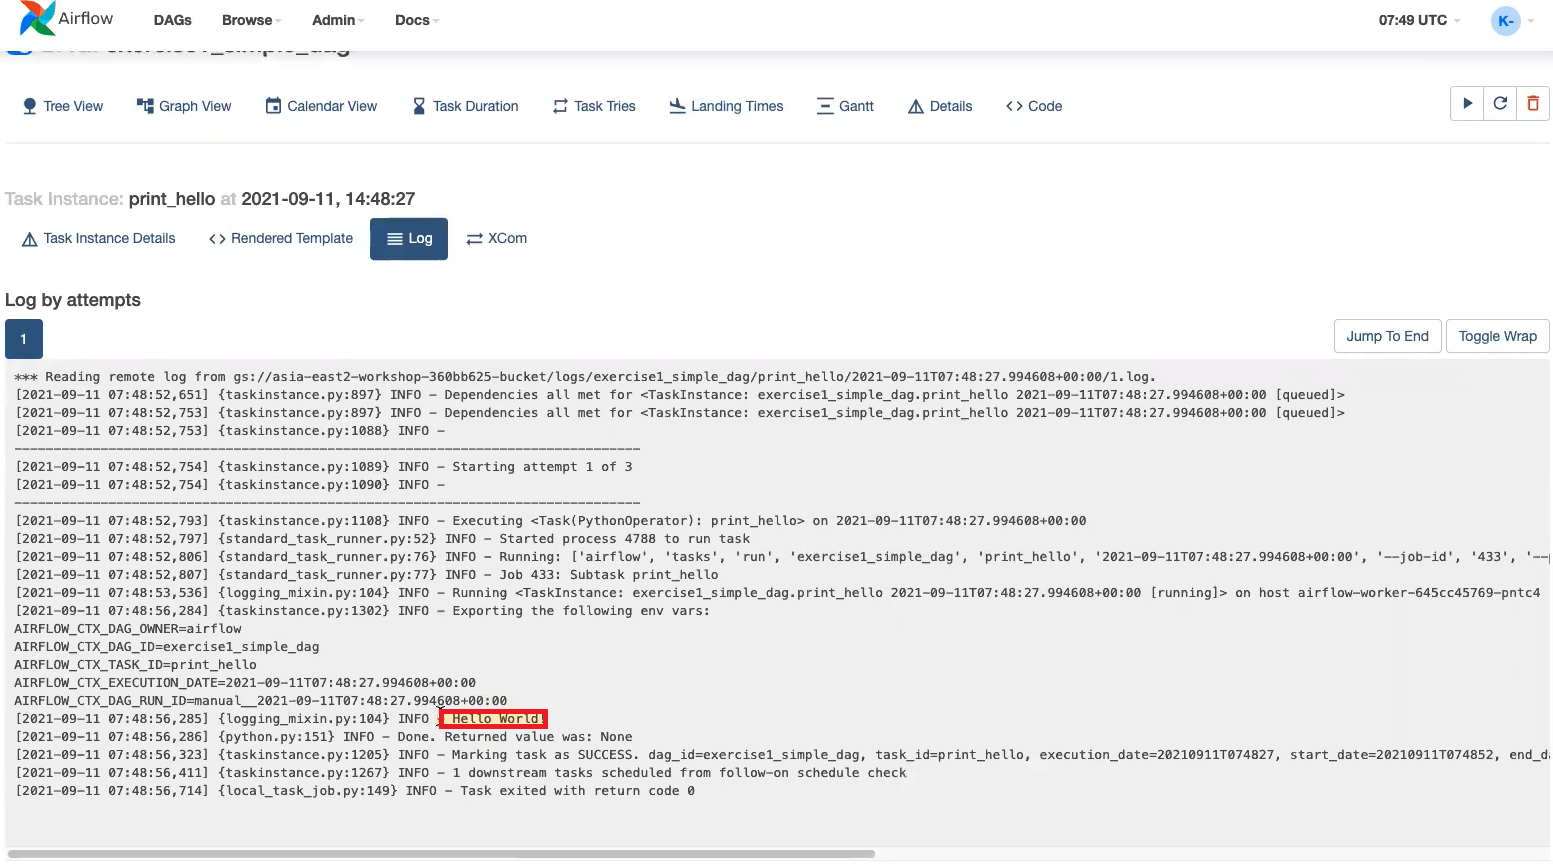

* ดู log ของ task print_date

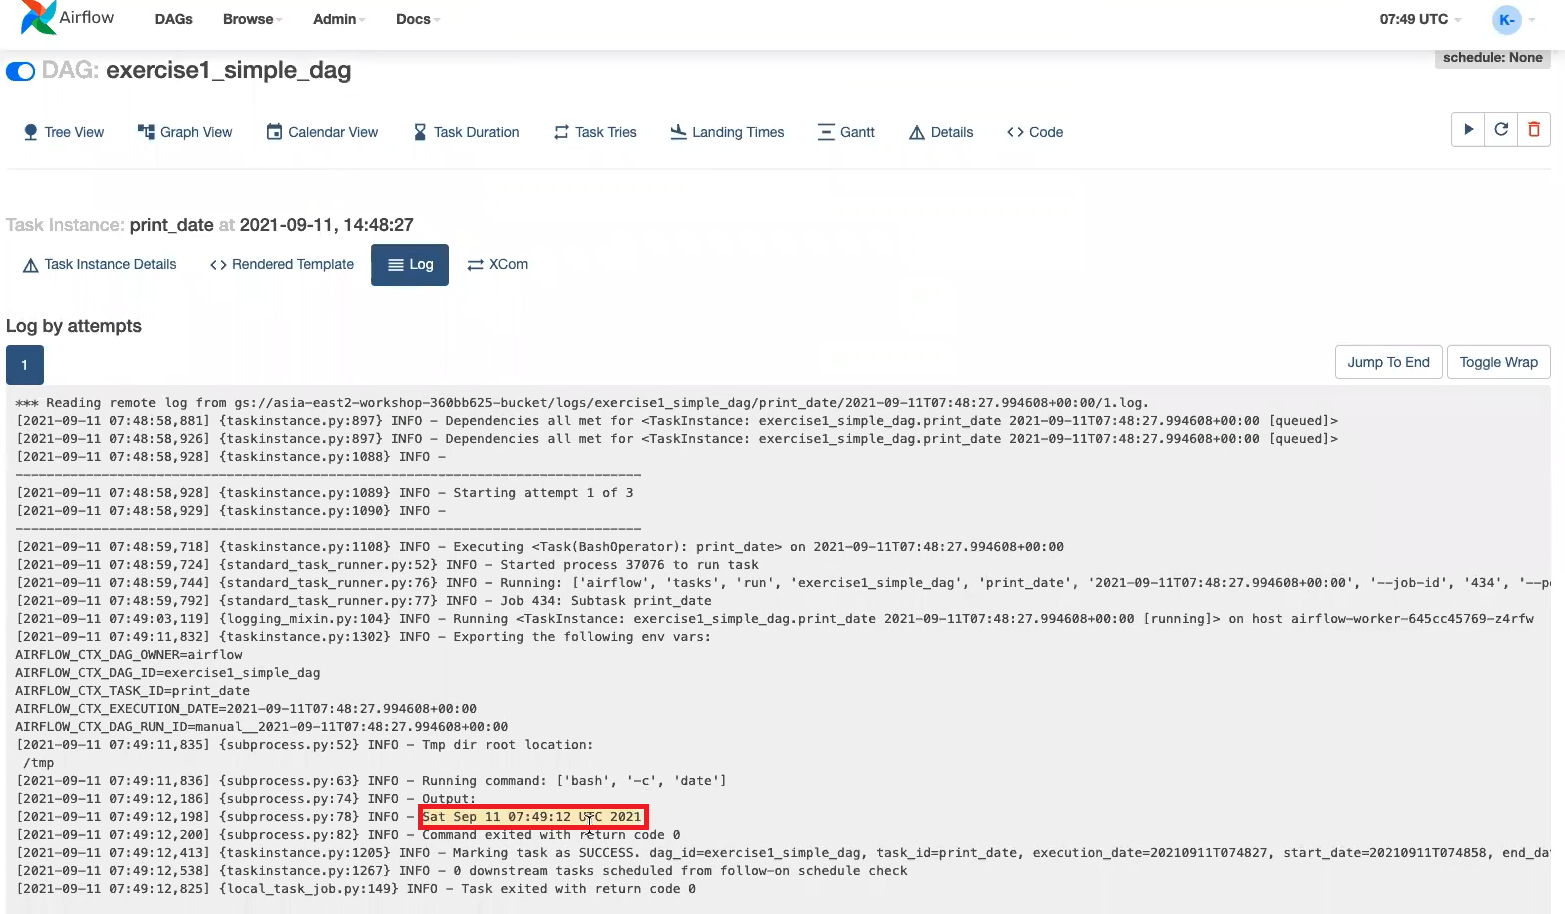

### Exercise 2

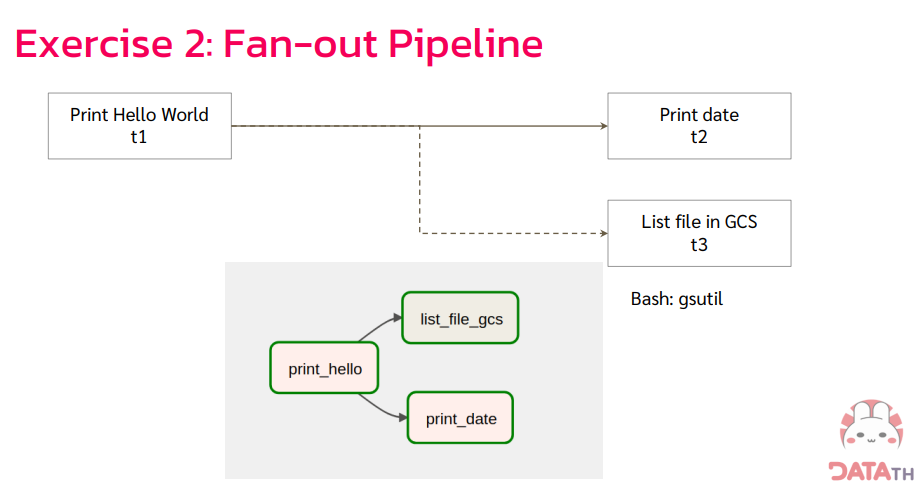

1. สร้างไฟล์ DAG ที่ cloud shell โดยใช้ชื่อไฟล์ว่า `start_ws4_exercise2`

In [ ]:
import datetime

from airflow.models import DAG
from airflow.operators.python import PythonOperator
from airflow.operators.bash import BashOperator
from airflow.utils.dates import days_ago

default_args = {
    'owner': 'datath',
}


def my_function(something: str):
    print(something)


with DAG(
    "exercise2_fan_out_dag",
    start_date=days_ago(1),
    schedule_interval=None,
    tags=["exercise"]
) as dag:

    # Exercise2: Fan-out Pipeline
    # ใน exercise นี้จะได้รู้จักกับการแยก pipeline ออกเพื่อให้ทำงานแบบ parallel พร้อมกันได้
    # และทดลองใช้คำสั่ง gsutil จาก BashOperator

    t1 = PythonOperator(
        task_id="print_hello",
        python_callable=my_function,
        op_kwargs={"something": "Hello World!"},
    )

    t2 = BashOperator(
        task_id="print_date",
        bash_command="echo $(date)",
    )

    #TODO: ใส่ task t3 สำหรับ list ไฟล์ใน GCS bucket ที่เป็น DAGs folder
    #hint: ใช้ BashOperator ร่วมกับ command gsutil

    t3 = BashOperator(
        task_id="list_file_gcs",
        bash_command="gsutil ls gs://asia-east2-workshop-360bb625-bucket/dags"
    )

    # TODO: ใส่ task dependencies ที่ทำให้รัน t3 พร้อมกับ t2 ได้
    t1 >> [t2, t3]


* หรือเขียน DAG เป็น taskflow

In [ ]:
import datetime

from airflow.decorators import dag, task
from airflow.operators.bash import BashOperator
from airflow.utils.dates import days_ago

default_args = {
    'owner': 'datath',
}

@task()
def print_hello():
    print("Hello World!")

@task()
def print_date():
    print(datetime.datetime.now())


@dag(default_args=default_args, schedule_interval=None, start_date=days_ago(1), tags=['exercise'])
def exercise2_taskflow_dag():

    t1 = print_hello()
    t2 = print_date()

    # Exercise2: Fan-out Pipeline
    # ใน exercise นี้จะได้รู้จักกับการแยก pipeline ออกเพื่อให้ทำงานแบบ parallel พร้อมกันได้
    # ซึ่ง TaskFlow แบบใหม่ ก็สามารถใช้งานร่วมกับการเขียน Operator แบบเดิมได้เหมือนกัน

    t3 = BashOperator(
        task_id="list_file_gcs",
        bash_command="gsutil ls gs://asia-east2-workshop-360bb625-bucket/dags"
    )

    t1 >> [t2, t3]

exercise2_dag = exercise2_taskflow_dag()

2. Upload ไฟล์ DAG เข้าสู่ bucket ที่เชื่อมต่อกับ Cloud Composer
```
gsutil cp [FILE] gs://[CLOUD_COMPOSER_BUCKET]/dags/
```

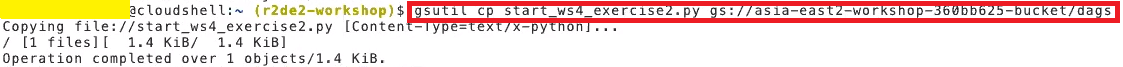

3. เข้าไปดูที่ airflow เพื่อดูผลลัพธ์

* run task เสร็จเรียบร้อย

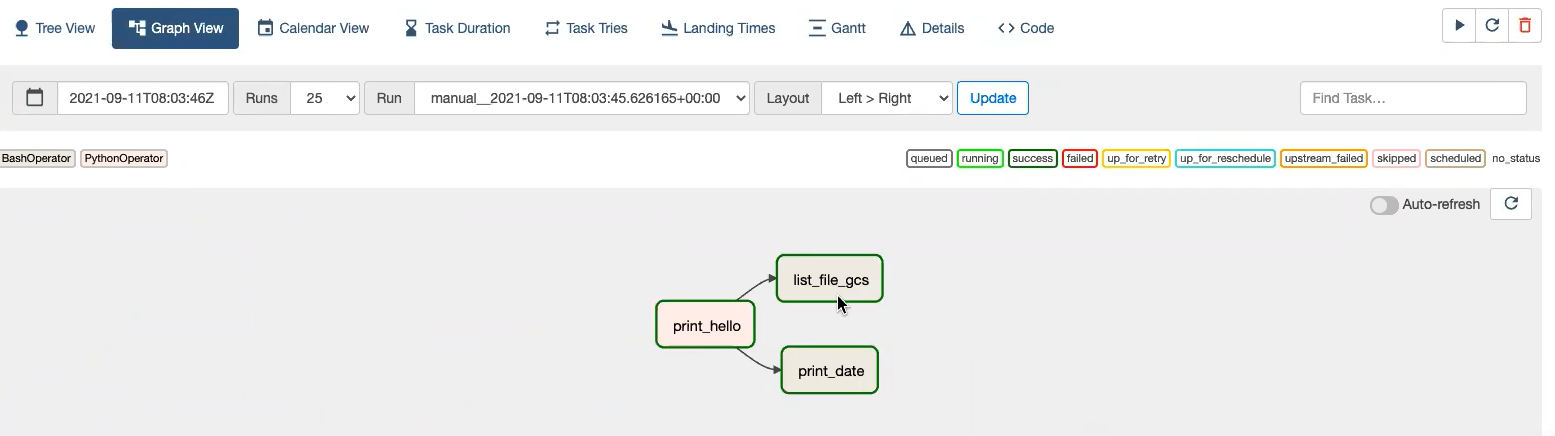

* ดู log ของ task list_file_gcs

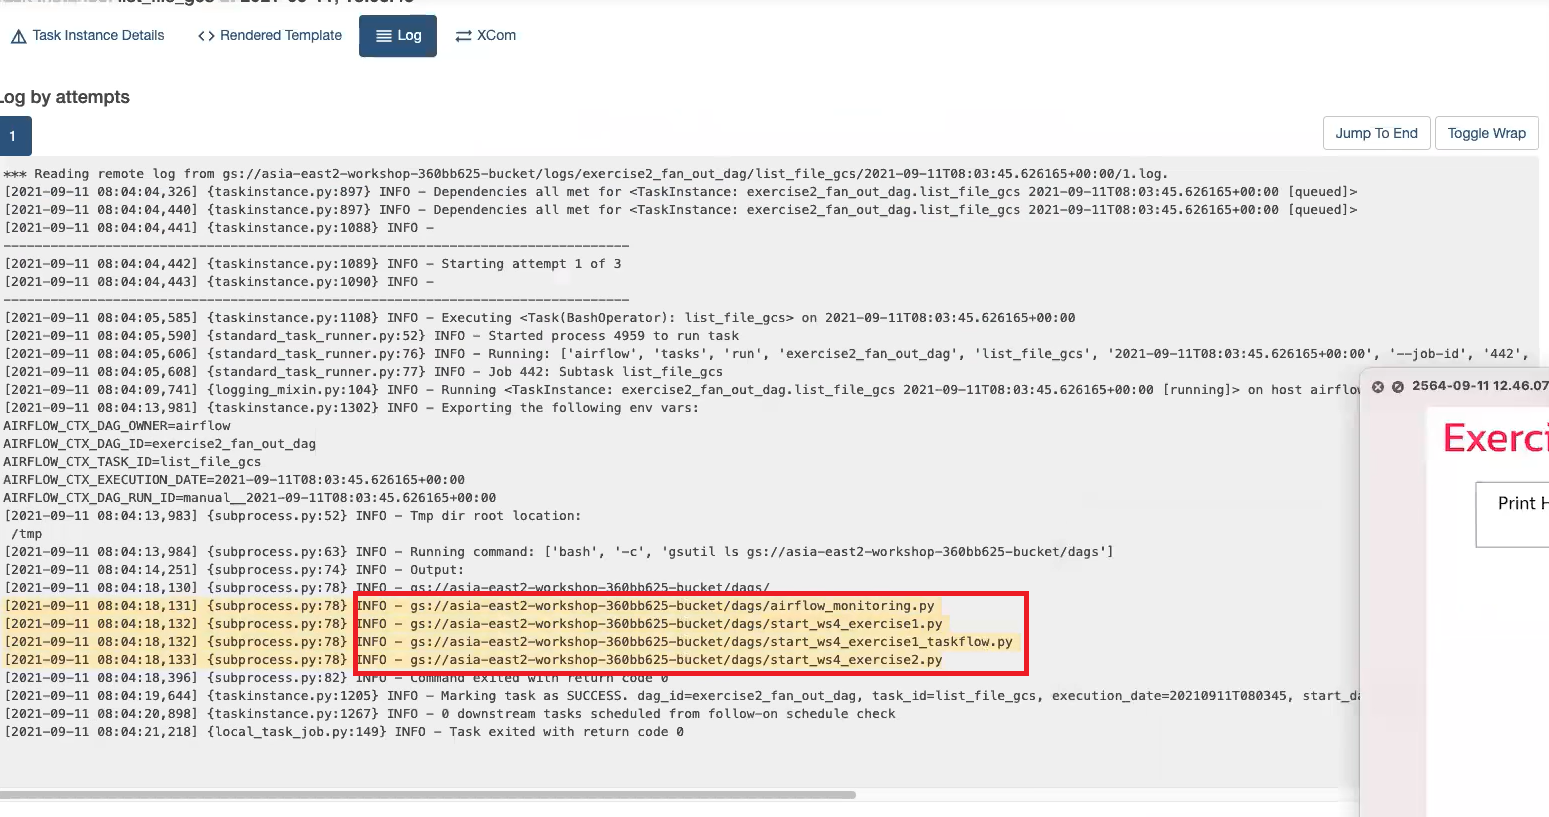

### Exercise 3

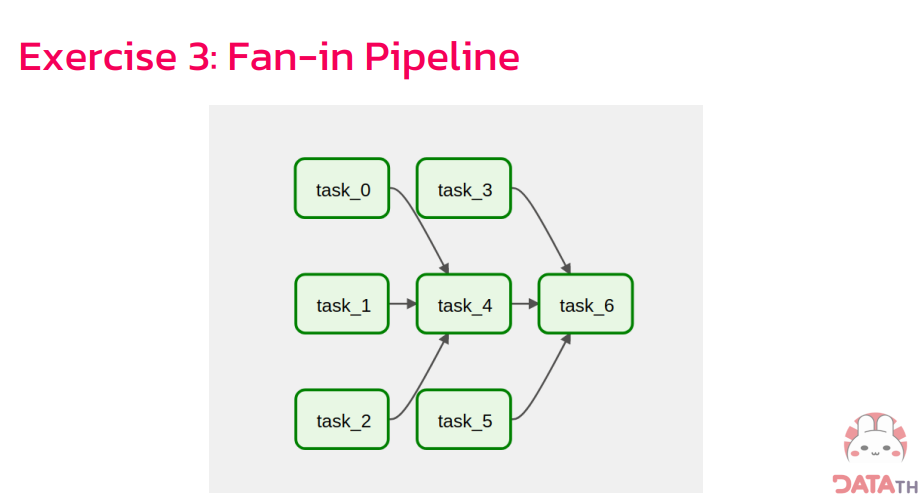

1. สร้างไฟล์ DAG ที่ cloud shell โดยใช้ชื่อไฟล์ว่า `start_ws4_exercise3`

In [ ]:
from airflow.models import DAG
from airflow.operators.dummy import DummyOperator
from airflow.utils.dates import days_ago

with DAG(
    "exercise3_fan_in_dag",
    start_date=days_ago(1),
    schedule_interval=None,
    tags=["exercise"]
) as dag:

    # Exercise3: Fan-in Pipeline
    # ใน exercise นี้จะได้รู้จักการเขียน task ใน pipeline ขั้นตอนเยอะขึ้น
    # ใช้ DummyOperator เป็น task จำลอง

    # TODO: สร้าง DummyOperator เพื่อสร้าง dependency ที่ซับซ้อน
    t = [DummyOperator(task_id=f"task_{i}") for i in range(7)]

    [t[0], t[1], t[2]] >> t[4]
    [t[3], t[4], t[5]] >> t[6]

2. Upload ไฟล์ DAG เข้าสู่ bucket ที่เชื่อมต่อกับ Cloud Composer
```
gsutil cp [FILE] gs://[CLOUD_COMPOSER_BUCKET]/dags/
```

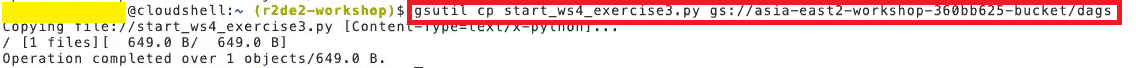

3. เข้าไปดูที่ airflow เพื่อดูผลลัพธ์

* run task เสร็จเรียบร้อย

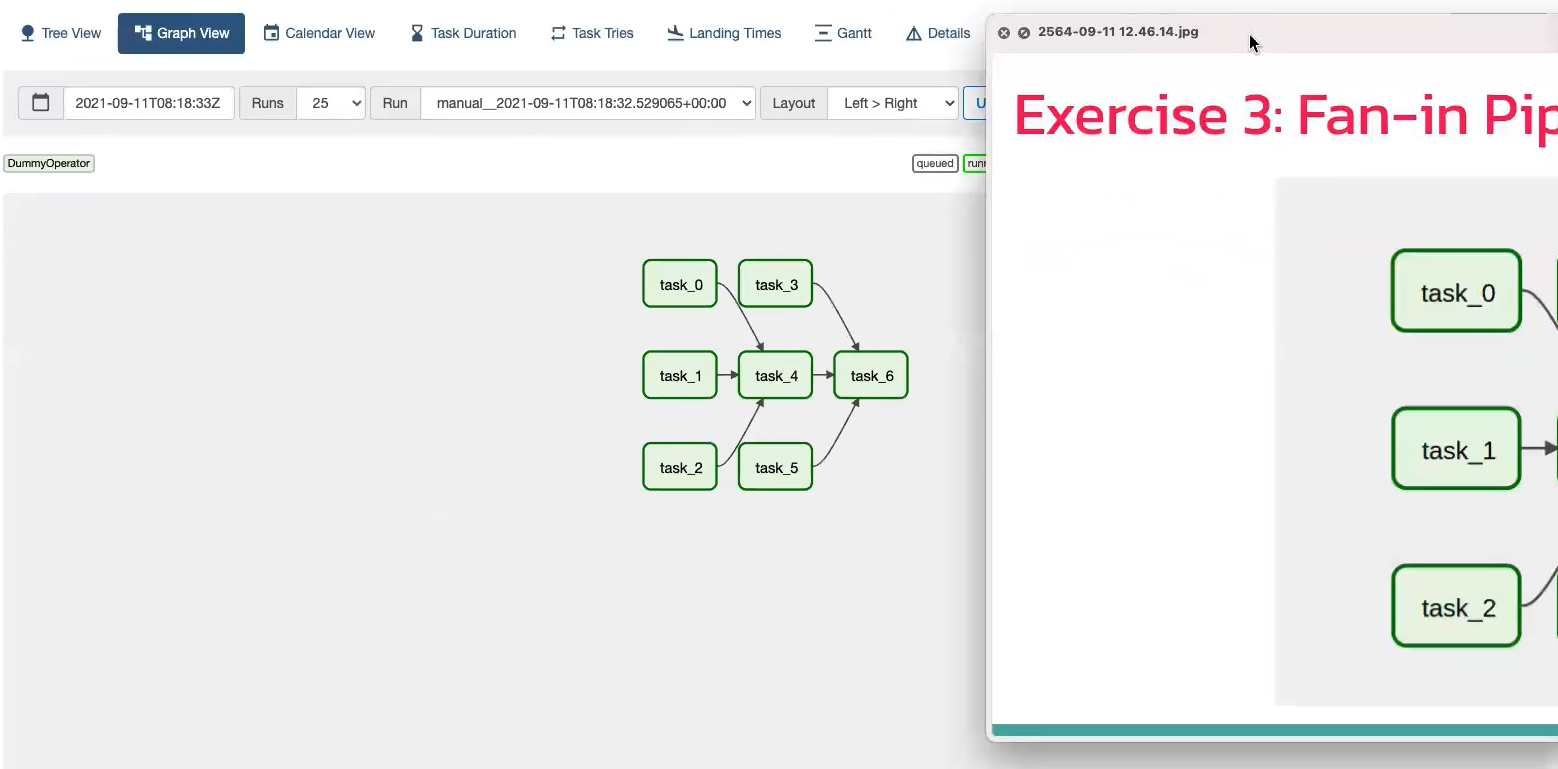

### Exercise 4

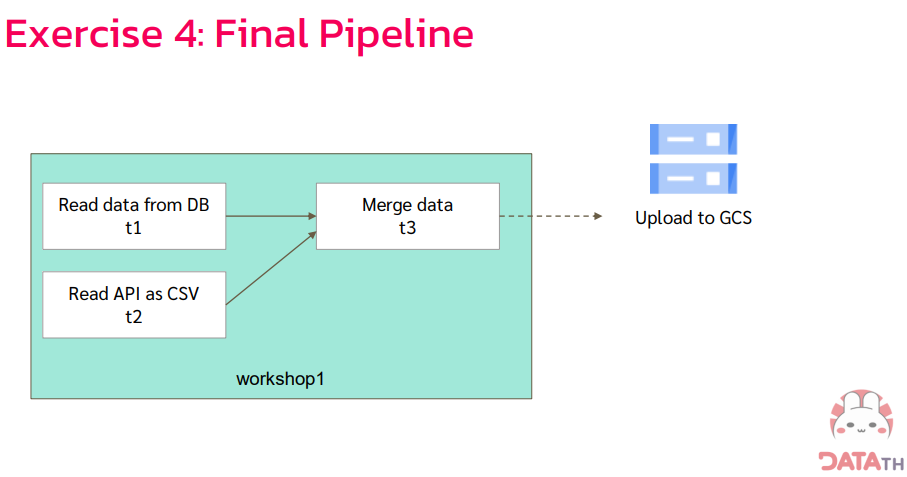

1. นำ code ของ workshop1 แปลงให้อยู่ในไฟล์ DAG

In [ ]:
from airflow.models import DAG
from airflow.operators.python import PythonOperator
from airflow.providers.mysql.hooks.mysql import MySqlHook
from airflow.utils.dates import days_ago
import pandas as pd
import requests

MYSQL_CONNECTION = "mysql_default"   # ชื่อของ connection ใน Airflow ที่เซ็ตเอาไว้
CONVERSION_RATE_URL = "https://r2de2-workshop-vmftiryt6q-ts.a.run.app/usd_thb_conversion_rate"

# path ที่จะใช้
mysql_output_path = "/home/airflow/gcs/data/audible_data_merged.csv"
conversion_rate_output_path = "/home/airflow/gcs/data/conversion_rate.csv"
final_output_path = "/home/airflow/gcs/data/output.csv"


def get_data_from_mysql(transaction_path):
    # รับ transaction_path มาจาก task ที่เรียกใช้

    # เรียกใช้ MySqlHook เพื่อต่อไปยัง MySQL จาก connection ที่สร้างไว้ใน Airflow
    mysqlserver = MySqlHook(MYSQL_CONNECTION)

    # Query จาก database โดยใช้ Hook ที่สร้าง ผลลัพธ์ได้ pandas DataFrame
    audible_data = mysqlserver.get_pandas_df(sql="SELECT * FROM audible_data")
    audible_transaction = mysqlserver.get_pandas_df(sql="SELECT * FROM audible_transaction")

    # Merge data จาก 2 DataFrame เหมือนใน workshop1
    df = audible_transaction.merge(audible_data, how="left", left_on="book_id", right_on="Book_ID")

    # Save ไฟล์ CSV ไปที่ transaction_path ("/home/airflow/gcs/data/audible_data_merged.csv")
    # จะไปอยู่ที่ GCS โดยอัตโนมัติ
    df.to_csv(transaction_path, index=False)
    print(f"Output to {transaction_path}")


def get_conversion_rate(conversion_rate_path):
    r = requests.get(CONVERSION_RATE_URL)
    result_conversion_rate = r.json()
    df = pd.DataFrame(result_conversion_rate)

    # เปลี่ยนจาก index ที่เป็น date ให้เป็น column ชื่อ date แทน แล้วเซฟไฟล์ CSV
    df = df.reset_index().rename(columns={"index": "date"})
    df.to_csv(conversion_rate_path, index=False)
    print(f"Output to {conversion_rate_path}")


def merge_data(transaction_path, conversion_rate_path, output_path):
    # อ่านจากไฟล์ สังเกตว่าใช้ path จากที่รับ parameter มา
    transaction = pd.read_csv(transaction_path)
    conversion_rate = pd.read_csv(conversion_rate_path)

    transaction['date'] = transaction['timestamp']
    transaction['date'] = pd.to_datetime(transaction['date']).dt.date
    conversion_rate['date'] = pd.to_datetime(conversion_rate['date']).dt.date

    # merge 2 DataFrame
    final_df = transaction.merge(conversion_rate, how="left", left_on="date", right_on="date")

    # แปลงราคา โดยเอาเครื่องหมาย $ ออก และแปลงให้เป็น float
    final_df["Price"] = final_df.apply(lambda x: x["Price"].replace("$",""), axis=1)
    final_df["Price"] = final_df["Price"].astype(float)

    final_df["THBPrice"] = final_df["Price"] * final_df["conversion_rate"]
    final_df = final_df.drop(["date", "book_id"], axis=1)

    # save ไฟล์ CSV
    final_df.to_csv(output_path, index=False)
    print(f"Output to {output_path}")
    print("== End of Workshop 4 ʕ•́ᴥ•̀ʔっ♡ ==")


with DAG(
    "exercise4_final_dag",
    start_date=days_ago(1),
    schedule_interval="@once",
    tags=["workshop"]
) as dag:

    dag.doc_md = """
    # Exercise4: Final DAG
    ใน exercise นี้จะนำโค้ดที่เคยเขียนไว้ใน workshop1 มาทำให้เป็น pipeline บน Airflow [ทบทวนได้ที่นี่](https://colab.research.google.com/drive/1LQDVS0ayxFKF_ln-mc4CqLeayxzUKqZP?authuser=1)
    """

    t1 = PythonOperator(
        task_id="get_data_from_mysql",
        python_callable=get_data_from_mysql,
        op_kwargs={
            "transaction_path": mysql_output_path,
        },
    )

    t2 = PythonOperator(
        task_id="get_conversion_rate",
        python_callable=get_conversion_rate,
        op_kwargs={
            "conversion_rate_path": conversion_rate_output_path,
        },
    )

    t3 = PythonOperator(
        task_id="merge_data",
        python_callable=merge_data,
        op_kwargs={
            "transaction_path": mysql_output_path,
            "conversion_rate_path": conversion_rate_output_path,
            "output_path" : final_output_path,
        },
    )

    [t1, t2] >> t3
